## Testing whether it is from the data size

In [36]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [37]:
series = 37
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader1 = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node')
# loader2 = Loader(
#     series_path=series_path, config_key_mapper=config_key_mapper, second_node=False, type_of='node_with_log')
results_1 = loader1.result_processing()
# results_2 = loader2.result_processing()
key_config_df = loader1.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine
0,1,6-mlserver-mock,mock-one,0,4,8Gi,1,1,100,60,37,mlserver-big,1,False
1,2,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,37,mlserver-big,1,False


In [38]:
results_1

,experiment_id,client_to_model_latencies_avg,client_to_model_latencies_p99,client_to_model_latencies_p50,client_to_model_latencies_var,client_to_model_latencies_max,client_to_model_latencies_min,model_latencies_avg,model_latencies_p99,model_latencies_p50,...,memory_usage_p50,memory_usage_var,memory_usage_max,memory_usage_min,throughput_avg,throughput_p99,throughput_p50,throughput_var,throughput_max,throughput_min
0,1,0.621333,1.266224,0.594677,0.087865,1.319601,0.027597,1.003172,1.038867,1.000713,...,None,None,None,None,None,None,None,None,None,None
1,2,151.921275,296.825156,152.140309,7395.705052,299.960467,0.133336,1.003085,1.036113,1.000532,...,None,None,None,None,None,None,None,None,None,None


In [39]:
results_1.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [40]:
configs = loader1.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0'],
    'no_engine': False,
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 37,
    'series_meta': 'mlserver-big',
    'timeout': 5,
    'workload_config': {'load_duration': 60, 'loads_to_test': [100, 1000]},
    'workload_type': 'static'}


In [41]:
model_variant = 1
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 0]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['timeout_count']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
# ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
# ax.set_xlabel("Load")
# ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,load,timeout_count
0,0,1,4,100,0
1,0,1,4,1000,27409


,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,100,0.621333,1.003172,0.002935
1,0,1,4,1000,151.921275,1.003085,0.009609


Text(0, 0.5, 'Latency (seconds)')

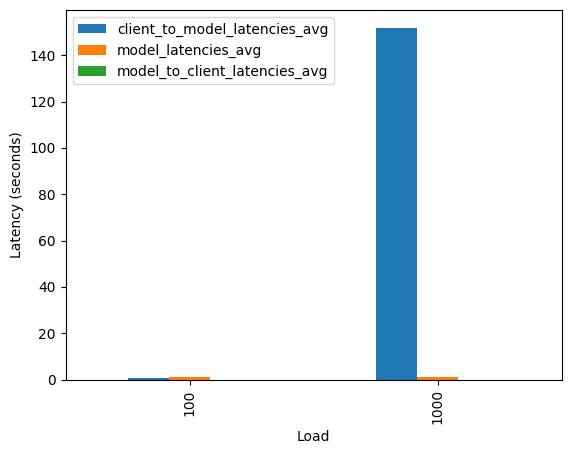

In [42]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,load,client_to_model_latencies_max,model_latencies_max,model_to_client_latencies_max
0,0,1,4,100,1.319601,1.069726,0.086862
1,0,1,4,1000,299.960467,1.085839,0.838348


Text(0, 0.5, 'Latency (seconds)')

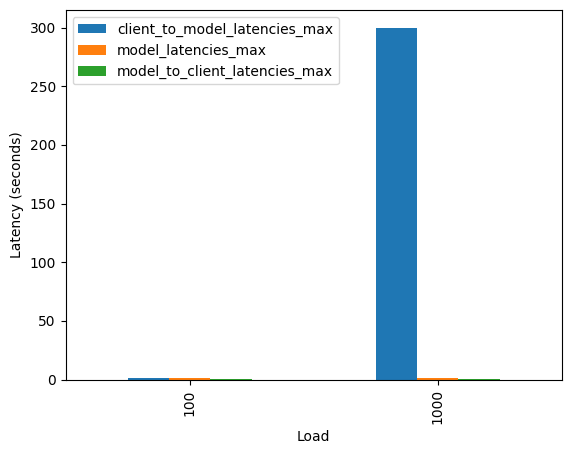

In [43]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max']
output = loader1.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_max', 'model_latencies_max', 'model_to_client_latencies_max'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

In [44]:
import time
results = loader1.read_results()
experiment_id = 4
responses = loader1.flatten_results(results[str(experiment_id)]['responses'])
sending_times = []
for response in responses:
    try:
        sending_time = time.ctime(response['timing']['sending_time'])
        model_arrival_time = time.ctime(
        json.loads(
            response['outputs'][0][
                'data'][0])['time']['arrival_mock_one'])
        arrival_time = time.ctime(response['timing']['arrival_time'])
    except KeyError:
        # print('timed out!')
        pass
    print(f"sending time: {sending_time}, model_arrival_time: {model_arrival_time}, arrival time: {arrival_time}")

KeyError: '4'